# Deliciosas Cozinhas Asiáticas e Indianas

## Introdução

A culinária asiática e indiana é conhecida pela sua diversidade de sabores, ingredientes únicos e técnicas de preparação. Este guia oferece uma visão geral de algumas receitas populares e dicas para recriar esses pratos em casa.

## Ingredientes Essenciais

### Cozinha Asiática
- Molho de soja
- Óleo de sésamo
- Gengibre fresco
- Alho
- Vinagre de arroz
- Pasta de miso

### Cozinha Indiana
- Garam masala
- Cúrcuma
- Cominhos
- Cardamomo
- Ghee
- Lentilhas

[!TIP] Certifique-se de usar ingredientes frescos para obter o melhor sabor possível.

## Receitas Populares

### Frango Teriyaki
O frango teriyaki é um prato japonês clássico que combina sabores doces e salgados. Para preparar, siga os passos abaixo:

1. Misture molho de soja, açúcar e vinagre de arroz para criar o molho teriyaki.
2. Cozinhe o frango numa frigideira até ficar dourado.
3. Adicione o molho e deixe reduzir até engrossar.
4. Sirva com arroz branco e vegetais cozidos.

### Caril de Lentilhas
O caril de lentilhas é uma opção vegetariana rica em proteínas e cheia de sabor. Para preparar:

1. Refogue cebola, alho e gengibre em ghee.
2. Adicione cúrcuma, cominhos e garam masala.
3. Misture lentilhas cozidas e tomate picado.
4. Deixe cozinhar até os sabores se misturarem.
5. Sirva com arroz basmati ou pão naan.

[!NOTE] Ajuste o nível de picante conforme o seu gosto.

## Dicas de Cozinha

- **Planeie com antecedência:** Muitos pratos asiáticos e indianos requerem marinadas ou tempos de cozimento prolongados.
- **Use utensílios adequados:** Uma wok ou uma panela de fundo pesado pode fazer toda a diferença.
- **Experimente:** Não tenha medo de ajustar os temperos para criar o seu próprio toque pessoal.

[!WARNING] Alguns ingredientes, como o molho de soja, podem conter altos níveis de sódio. Use com moderação.

## Conclusão

Cozinhar pratos asiáticos e indianos em casa pode ser uma experiência gratificante e deliciosa. Com os ingredientes certos e um pouco de prática, você pode trazer os sabores autênticos dessas cozinhas para a sua mesa.


Instale o Imblearn, que permitirá o SMOTE. Este é um pacote do Scikit-learn que ajuda a lidar com dados desequilibrados ao realizar classificação. (https://imbalanced-learn.org/stable/)


In [1]:
pip install imblearn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [3]:
df  = pd.read_csv('../../data/cuisines.csv')

Este conjunto de dados inclui 385 colunas que indicam todos os tipos de ingredientes em várias cozinhas de um determinado conjunto de cozinhas.


In [4]:
df.head()

Unnamed: 0 cuisine  almond  angelica  anise  anise_seed  apple  \
0          65  indian       0         0      0           0      0   
1          66  indian       1         0      0           0      0   
2          67  indian       0         0      0           0      0   
3          68  indian       0         0      0           0      0   
4          69  indian       0         0      0           0      0   

   apple_brandy  apricot  armagnac  ...  whiskey  white_bread  white_wine  \
0             0        0         0  ...        0            0           0   
1             0        0         0  ...        0            0           0   
2             0        0         0  ...        0            0           0   
3             0        0         0  ...        0            0           0   
4             0        0         0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 385 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


In [6]:
df.cuisine.value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

Mostrar as cozinhas num gráfico de barras


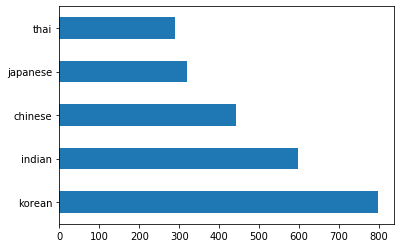

In [7]:
df.cuisine.value_counts().plot.barh()

In [8]:

thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


In [9]:
def create_ingredient_df(df):
    # transpose df, drop cuisine and unnamed rows, sum the row to get total for ingredient and add value header to new df
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    # drop ingredients that have a 0 sum
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    # sort df
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)
    return ingredient_df


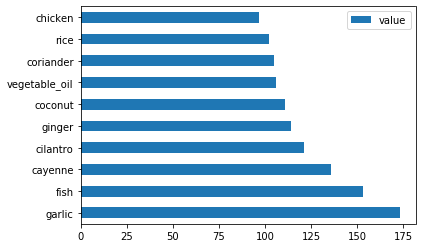

In [10]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

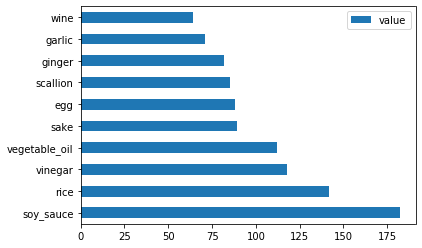

In [11]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

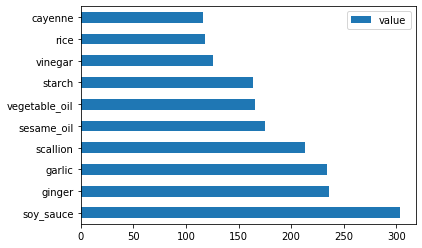

In [12]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

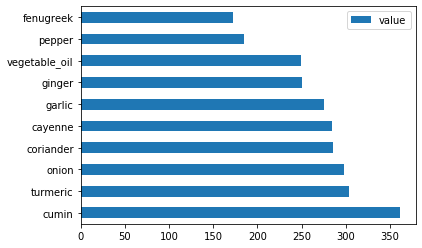

In [13]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

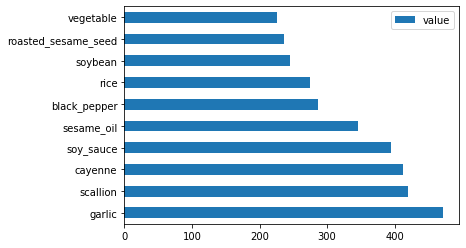

In [14]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

In [15]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()


almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  \
0       0         0      0           0      0             0        0   
1       1         0      0           0      0             0        0   
2       0         0      0           0      0             0        0   
3       0         0      0           0      0             0        0   
4       0         0      0           0      0             0        0   

   armagnac  artemisia  artichoke  ...  whiskey  white_bread  white_wine  \
0         0          0          0  ...        0            0           0   
1         0          0          0  ...        0            0           0   
2         0          0          0  ...        0            0           0   
3         0          0          0  ...        0            0           0   
4         0          0          0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 380 columns]

Equilibre os dados com sobreamostragem SMOTE para a classe mais alta. Leia mais aqui: https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html


In [16]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [17]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: korean      799
chinese     799
japanese    799
indian      799
thai        799
Name: cuisine, dtype: int64
old label count: korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


In [18]:
transformed_feature_df.head()

almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  \
0       0         0      0           0      0             0        0   
1       1         0      0           0      0             0        0   
2       0         0      0           0      0             0        0   
3       0         0      0           0      0             0        0   
4       0         0      0           0      0             0        0   

   armagnac  artemisia  artichoke  ...  whiskey  white_bread  white_wine  \
0         0          0          0  ...        0            0           0   
1         0          0          0  ...        0            0           0   
2         0          0          0  ...        0            0           0   
3         0          0          0  ...        0            0           0   
4         0          0          0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 380 columns]

In [19]:
# export transformed data to new df for classification
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')
transformed_df

cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
0     indian       0         0      0           0      0             0   
1     indian       1         0      0           0      0             0   
2     indian       0         0      0           0      0             0   
3     indian       0         0      0           0      0             0   
4     indian       0         0      0           0      0             0   
...      ...     ...       ...    ...         ...    ...           ...   
3990    thai       0         0      0           0      0             0   
3991    thai       0         0      0           0      0             0   
3992    thai       0         0      0           0      0             0   
3993    thai       0         0      0           0      0             0   
3994    thai       0         0      0           0      0             0   

      apricot  armagnac  artemisia  ...  whiskey  white_bread  white_wine  \
0           0         0          0  ...        0            0           0   
1           0         0          0  ...        0            0           0   
2           0         0          0  ...        0            0           0   
3           0         0          0  ...        0            0           0   
4           0         0          0  ...        0            0           0   
...       ...       ...        ...  ...      ...          ...         ...   
3990        0         0          0  ...        0            0           0   
3991        0         0          0  ...        0            0           0   
3992        0         0          0  ...        0            0           0   
3993        0         0          0  ...        0            0           0   
3994        0         0          0  ...        0            0           0   

      whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                           0     0     0    0      0       0         0  
1                           0     0     0    0      0       0         0  
2                           0     0     0    0      0       0         0  
3                           0     0     0    0      0       0         0  
4                           0     0     0    0      0       1         0  
...                       ...   ...   ...  ...    ...     ...       ...  
3990                        0     0     0    0      0       0         0  
3991                        0     0     0    0      0       0         0  
3992                        0     0     0    0      0       0         0  
3993                        0     0     0    0      0       0         0  
3994                        0     0     0    0      0       0         0  

[3995 rows x 381 columns]

In [20]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


In [21]:
transformed_df.to_csv("../../data/cleaned_cuisines.csv")


---

**Aviso Legal**:  
Este documento foi traduzido utilizando o serviço de tradução por IA [Co-op Translator](https://github.com/Azure/co-op-translator). Embora nos esforcemos para garantir a precisão, é importante notar que traduções automáticas podem conter erros ou imprecisões. O documento original na sua língua nativa deve ser considerado a fonte autoritária. Para informações críticas, recomenda-se a tradução profissional realizada por humanos. Não nos responsabilizamos por quaisquer mal-entendidos ou interpretações incorretas decorrentes da utilização desta tradução.
